# Employees Exit Survey

This project is mainly to showcase my data cleaning skills.

### The dataset
The datasets used is an exit survey given to employees who work in the Department of Education, Training and Employment (DETE) and Technical and Further Education (TAFE) institute in Queensland, Australia.

Click on the link for the original dataset: 

   [DETE](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey)
   
   [TAFE] - no longer available
   
These datasets has been modified slightly.

### Stakeholder Objectives
Stakeholders want the following questions answered:

1. Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
2. Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

### Data dictionary
DETE Dataset

|Var name|Description|
|---|---|
|ID|id used to identify the participant of the survey|
|SeperationType|reason why the person's employment ended|
|Cease Date|year or month the person's employment ended|
|DETE Start Date|year the person began employment with the DETE|

TAFE Dataset

|Var name|Description|
|---|---|
|Record ID|id used to identify the participant of the survey|
|Reason for ceasing employment|reason why the person's employment ended|
|LengthofServiceOverall. Overall Length of Service at Institute (in years)|length of the person's employment (in years)|

In [1]:
#Imports
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import timedelta
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Dataset read
dete_survey = pd.read_csv('dete_survey.csv', na_values = 'Not Stated') #Updated na_values
tafe_survey = pd.read_csv('tafe_survey.csv')

## Inspection of DETE dataset

In [3]:
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [4]:
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   822 non-null    int64  
 1   SeparationType                       822 non-null    object 
 2   Cease Date                           788 non-null    object 
 3   DETE Start Date                      749 non-null    float64
 4   Role Start Date                      724 non-null    float64
 5   Position                             817 non-null    object 
 6   Classification                       455 non-null    object 
 7   Region                               717 non-null    object 
 8   Business Unit                        126 non-null    object 
 9   Employment Status                    817 non-null    object 
 10  Career move to public sector         822 non-null    bool   
 11  Career move to private sector   

In [5]:
dete_survey.isnull().sum()

ID                                       0
SeparationType                           0
Cease Date                              34
DETE Start Date                         73
Role Start Date                         98
Position                                 5
Classification                         367
Region                                 105
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

In [6]:
def series_check(dataframe, var_name):
    header = dataframe[var_name].value_counts(dropna=False)
    return header

NOTES:
* Duration of employment needs to be calculated
    * This would mean both Start and End date would need to be converted to datetime
* Null values are recorded as `Not Stated`
* There seems to be various unneeded variables
    * Many variables aren't related to disatisfaction of the job
        * I would need more detail on the question to decide which of the latter half with opinion based options can help quantify job satisfaction. The questions can be vague and `A`/Agree could refer to either side of the spectrum. However I do believe the underlying question would be what the opinion of the employee is that the company complies with the positive spectrum of these characteristics.
            * This could be analysed to see where employees believe the company is lacking
        * I will be focusing on the binary option questions as this seems to be referring to the reason for the employees exiting the company
        * From this list I will be using 
        
           `['Job dissatisfaction', 'Dissatisfaction with the department', 'Physical work environment', 'Lack of recognition', 'Lack of job security', 'Employment conditions', 'Work life balance', 'Workload']`
* Duplication of variables
    * Work life balance + Worklife balance # Upon further inspection these seem to be different questions with similar options

In [7]:
series_check(dete_survey, 'Age')

61 or older      222
56-60            174
51-55            103
46-50             63
41-45             61
26-30             57
36-40             51
21-25             40
31-35             39
NaN               11
20 or younger      1
Name: Age, dtype: int64

## Inspection of TAFE Dataset

In [8]:
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [9]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

In [10]:
tafe_survey.isnull().sum()

Record ID                                                                      0
Institute                                                                      0
WorkArea                                                                       0
CESSATION YEAR                                                                 7
Reason for ceasing employment                                                  1
                                                                            ... 
CurrentAge. Current Age                                                      106
Employment Type. Employment Type                                             106
Classification. Classification                                               106
LengthofServiceOverall. Overall Length of Service at Institute (in years)    106
LengthofServiceCurrent. Length of Service at current workplace (in years)    106
Length: 72, dtype: int64

In [11]:
series_check(tafe_survey, 'Contributing Factors. Dissatisfaction')

-                                         371
NaN                                       265
Contributing Factors. Dissatisfaction      66
Name: Contributing Factors. Dissatisfaction, dtype: int64

NOTE:
* There are too many variables
    * There are only two variables which are usable
    
    `['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']`
* It seems to record data differently
    * `-` seems to refer to no
* Column names would need to change to allow easier reading
    * I want to create a dataset where value is True if the employee was disatisfied based on survey results or else it is False
* TAFE dataset has a lot of NA values
    * Would need to decide what to do with these values

In [12]:
# Updating datasets
dete_survey = dete_survey[['ID','SeparationType', 'Cease Date', 'DETE Start Date', 'Job dissatisfaction', 'Dissatisfaction with the department', 'Physical work environment', 'Lack of recognition', 'Lack of job security', 'Employment conditions', 'Work life balance', 'Workload', 'Age']]
tafe_survey = tafe_survey[['Record ID', 'Reason for ceasing employment','LengthofServiceOverall. Overall Length of Service at Institute (in years)', 'Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction', 'CurrentAge. Current Age']]

In [13]:
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Job dissatisfaction,Dissatisfaction with the department,Physical work environment,Lack of recognition,Lack of job security,Employment conditions,Work life balance,Workload,Age
0,1,Ill Health Retirement,08/2012,1984.0,True,False,False,True,False,False,False,False,56-60
1,2,Voluntary Early Retirement (VER),08/2012,NaN,False,False,False,False,False,False,False,False,56-60
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,False,False,False,False,False,False,False,False,61 or older
3,4,Resignation-Other reasons,05/2012,2005.0,False,False,False,False,False,False,False,False,36-40
4,5,Age Retirement,05/2012,1970.0,False,False,False,False,False,False,True,False,61 or older


In [14]:
tafe_survey.head()

,Record ID,Reason for ceasing employment,LengthofServiceOverall. Overall Length of Service at Institute (in years),Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,CurrentAge. Current Age
0,6.341330e+17,Contract Expired,1-2,NaN,NaN,26 30
1,6.341337e+17,Retirement,NaN,-,-,NaN
2,6.341388e+17,Retirement,NaN,-,-,NaN
3,6.341399e+17,Resignation,NaN,-,-,NaN
4,6.341466e+17,Resignation,3-4,-,-,41 45


# Tranforming+Cleaning
Firstly, I want to transform the DETE dataset so it is ready for analysis

In [15]:
# Rename Columns
dete_map = {
                'ID':'id', 
                'SeparationType': 'seperation_type', 
                'Cease Date': 'cease_date', 
                'DETE Start Date': 'start_date',
                'Job dissatisfaction': 'job_dissatisfaction',
                'Dissatisfaction with the department': 'department_dissatisfaction',
                'Physical work environment': 'work_environment',
                'Lack of recognition': 'recognition',
                'Lack of job security': 'job_security',
                'Employment conditions': 'conditions',
                'Work life balance': 'work_life',
                'Workload': 'workload',
                'Age': 'age'
            } 
dete_survey = dete_survey.rename(dete_map, axis = 1)

In [16]:
# Calculating employment duration
dete_survey['cease_date'] = pd.to_datetime(dete_survey['cease_date'])
dete_survey['start_date'] = pd.to_datetime(dete_survey['start_date'], format = '%Y')

dete_survey['work_length_exact'] = dete_survey['cease_date'] - (dete_survey['start_date'])

# This calculation may cause some of the lengths to be 0 days however placing them into ranges should solve that issue
# Converting into ranges (NOTE: the latter of the range is inclusive so 1-2 = 1 year < x < 3 years)
def datetime_comparison(element):
    if pd.isnull(element):
        return np.nan
    elif element < timedelta(days = 365):
        return 'Less than 1 year'
    elif element < timedelta(days = 1095):
        return '1-2'
    elif element < timedelta(days = 1825):
        return '3-4'
    elif element < timedelta(days = 2555):
        return '5-6'
    elif element < timedelta(days = 4015):
        return '7-10'
    elif element < timedelta(days = 7665):
        return '11-20'
    else:
        return 'More than 20 years'
    
dete_survey['work_length'] = dete_survey['work_length_exact'].map(datetime_comparison)

In [17]:
# Generating new variable for left for job disatisfaction
# True = At least 1 of the variables
# False = Some other reason
for i in ['department_dissatisfaction', 'work_environment', 'recognition', 'job_security', 'conditions', 'work_life', 'workload']:
    updated = dete_survey['job_dissatisfaction']
    updated = updated | dete_survey[i]
    
dete_survey['dissatisfaction'] = updated

In [18]:
# I want to normalise the ages to ease analysis at a later stage
# We only need to merge 61 or older and 56-60 together and form a group 56 or older
plus_56 = (dete_survey['age']=='56-60') | (dete_survey['age']=='61 or older')
dete_survey.loc[plus_56, 'age'] = '56 or older'

In [19]:
# Finally we want only the resignations
resig_bool = (dete_survey['seperation_type']=='Resignation-Other reasons') | (dete_survey['seperation_type']=='Resignation-Other employer') | (dete_survey['seperation_type']=='Resignation-Move overseas/interstate')
dete_survey_resign = dete_survey[resig_bool] 

Now, I want to transform the TAFE dataset so it is ready for analysis

In [20]:
# Rename columns
tafe_map = {
            'Record ID': 'id',
            'Reason for ceasing employment': 'reason', 
            'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'work_length', 
            'Contributing Factors. Dissatisfaction': 'dissatisfaction_other_x', 
            'Contributing Factors. Job Dissatisfaction': 'job_dissatisfaction_x', 
            'CurrentAge. Current Age': 'age'
            }
tafe_survey = tafe_survey.rename(tafe_map, axis = 1)

In [21]:
# Replace two relevant columns with boolean
def update_vals(element):
    if pd.isnull(element):
        return np.nan
    elif element == '-':
        return False
    else:
        return True
tafe_survey_bools = tafe_survey[['dissatisfaction_other_x','job_dissatisfaction_x']].applymap(update_vals)

In [22]:
#tafe_survey_bools['dissatisfaction'] = (tafe_survey_bools['dissatisfaction_other']) | (tafe_survey_bools['job_dissatisfaction'])
tafe_survey_bools['dissatisfaction'] = tafe_survey_bools.any(bool_only=True,axis=1)

nan_tafe_bool = (tafe_survey_bools['dissatisfaction_other_x'].isnull())&(tafe_survey_bools['job_dissatisfaction_x'].isnull())
tafe_survey_bools.loc[nan_tafe_bool,'dissatisfaction']=np.nan
tafe_survey_bools['dissatisfaction'] = tafe_survey_bools['dissatisfaction'].replace({1.0: True, 0.0: False})
tafe_survey_bools.columns = tafe_survey_bools.columns.str.replace('_x', '')

In [23]:
tafe_survey = pd.concat([tafe_survey, tafe_survey_bools], axis = 1)

In [24]:
# Now we need to find a way to standardise the ages
tafe_survey['age'] = tafe_survey['age'].str.replace('  ', '-')

In [25]:
# We need to find a way to normalise work_length:
#------------------------------------------------
# I have decided to convert work_length in dete_survey into ranges

In [26]:
resig_bool_tafe = tafe_survey['reason']=='Resignation'
tafe_survey_resig = tafe_survey[resig_bool_tafe]

In [27]:
# The final datasets
dete_survey_final = dete_survey_resign[[
                                        'id', 
                                        'work_length',
                                        'age',
                                        'dissatisfaction'
                                       ]]
tafe_survey_final = tafe_survey_resig[[
                                        'id', 
                                        'work_length',
                                        'age',
                                        'dissatisfaction'
                                        ]]

In [28]:
full_dataset = pd.concat(objs = [dete_survey_final, tafe_survey_final], axis=0, ignore_index=True)

In [44]:
full_dataset

,id,work_length,age,dissatisfaction,experience,age_cat
0,4.000000e+00,7-10,36-40,False,Established,30s
1,6.000000e+00,11-20,41-45,False,Veteran,40s
2,9.000000e+00,3-4,31-35,False,Experienced,30s
3,1.000000e+01,11-20,46-50,True,Veteran,40s
4,1.200000e+01,3-4,31-35,False,Experienced,30s
...,...,...,...,...,...,...
646,6.350660e+17,5-6,21-25,False,Experienced,Under 30s
647,6.350668e+17,1-2,51-55,False,New,Over 50s
648,6.350677e+17,NaN,NaN,False,NaN,NaN
649,6.350704e+17,5-6,51-55,False,Experienced,Over 50s


In [30]:
series_check(full_dataset, 'work_length')

1-2                   100
3-4                    99
Less than 1 year       93
NaN                    88
11-20                  83
5-6                    73
7-10                   62
More than 20 years     53
Name: work_length, dtype: int64

# Analysis
I have transformed and cleaned the dataset into a format I believe gives me an easy way to analyse the data to answer the specified questions.
## Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? 
### What about employees who have been there longer?

In [31]:
# Firstly we need to create a new column with 4 categories of experience
# New = <1 + 1-2
# Experienced = 3-4 + 5-6
# Established = 7-10
# Veteran = 11-20 + More than 20 years

exp_map = {'Less than 1 year': 'New',
           '1-2': 'New',
           '3-4': 'Experienced',
           '5-6': 'Experienced',
           '7-10': 'Established',
           '11-20': 'Veteran',
           'More than 20 year': 'Veteran'}

full_dataset['experience'] = full_dataset['work_length'].map(exp_map)

In [43]:
full_dataset[(full_dataset['dissatisfaction']!=1)&(full_dataset['dissatisfaction']!=0)]
#These observations can be dropped as they hold no useful data in all the other categories

,id,work_length,age,dissatisfaction,experience,age_cat


In [33]:
index_to_drop = full_dataset[(full_dataset['dissatisfaction']!=1)&(full_dataset['dissatisfaction']!=0)].index

In [34]:
full_dataset = full_dataset.drop(labels = index_to_drop, axis = 0)

In [68]:
# Percentage of dissatisfied employees per experience group
full_dataset['dissatisfaction'] = full_dataset['dissatisfaction'].astype(bool)
full_dataset['experience'] = pd.Categorical(full_dataset['experience'], ordered=True, categories=['New', 'Experienced', 'Established', 'Veteran'])
pivot_exp = full_dataset.pivot_table(values = 'dissatisfaction', index = 'experience', margins=True)

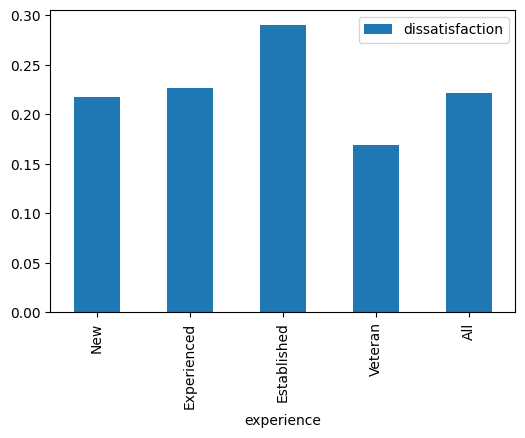

In [69]:
pivot_exp.plot(kind = 'bar')

The results show that more experienced employees on average left because they felt dissatisfied. However interestingly, there is a fine line between established employees and the veterans of the employees. One possible reason could be that veterans of the company are employees who may have formed a form of attachment with the company or the 'left overs' from the previously established employees who are satisfied with their job.
Less experienced workers had a fairly average percentage of workers who leave because of job dissatisfaction. New workers are slightly below average most likely due to the reason new workers are more likely to put up with dissatisfaction in order to gain experience.

## Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

In [42]:
# Firstly we need to create a new column with 4 categories of experience
# Under 30s = 20 or younger + 21-25 + 26-30
# 30s = 31-35 + 36-40
# 40s = 41-45 + 46-50
# Over 50s = 51-55 + 56 or older
age_map = {'20 or younger': 'Under 30s',
           '21-25': 'Under 30s',
           '26-30': 'Under 30s',
           '31-35': '30s',
           '36-40': '30s',
           '41-45': '40s',
           '46-50': '40s',
           '51-55': 'Over 50s',
           '56 or older': 'Over 50s'}
full_dataset['age_cat'] = full_dataset['age'].map(age_map)

In [45]:
series_check(full_dataset, 'age_cat')

40s          174
Over 50s     149
Under 30s    139
30s          134
NaN           47
Name: age_cat, dtype: int64

In [47]:
index_to_drop_2 = full_dataset[full_dataset['age_cat'].isnull()].index
# This is only around 7% of the dataset so it might be possible to drop these 
# Since the required age is missing it would be difficult to estimate this
# The data is most arguably missing at random so it is safe to drop the observations

In [49]:
full_dataset_2 = full_dataset.drop(index=index_to_drop_2)

In [70]:
full_dataset_2['age_cat'] = pd.Categorical(full_dataset_2['age_cat'], ordered=True, categories=['Under 30s','30s', '40s', 'Over 50s'])
pivot_age = full_dataset_2.pivot_table(values = 'dissatisfaction', index = 'age_cat', margins=True)

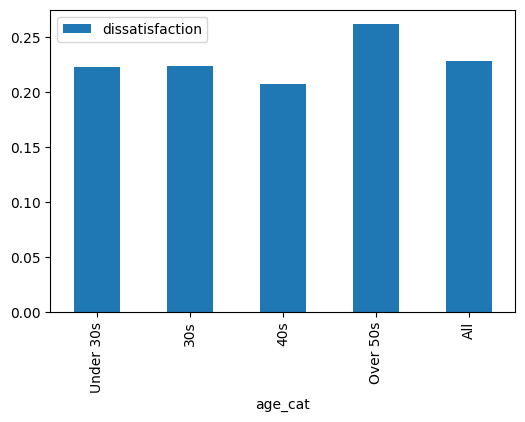

In [71]:
pivot_age.plot(kind = 'bar')

Interestingly, older employees on average left the firms because they are dissatisfied with the job. This intuitively makes sense as older employees genreally would have a larger pool of experience and potentially wealth built up. This would mean that older employees would have a larger expectation on what satisfactory job would be based on their vast previous experiences. If disatisfied they may also potentially have the wealth to keep them going during unemployment streaks and thus can afford to leave. 

# Conclusion

Summary of answers to question:
* More experienced workers are more likely to leave the job due to dissatisfaction with the exception of veteran employees
* Older employees (Over 50s) tend are more likely to leave their job dissatified